### Approximate SVB's period from theory

Back of the envelope calculation of the theoretical period of the seiche in SVB according to the Handbook of Coastal and Ocean Engineering, Chapter 11 Seiches and Harbor Oscillations by Alexander B. Rabinovich.

Semi-circle or ellipsoid with exponentially decaying bottom or paraboloidal bottom profile:

$$T_0=2.22\left[\frac{2L}{(gh)^{1/2}}\right],$$

where $L$ is the length from mouth to wall, and $h$ is the depth at the mouth

In [3]:
import cmocean as cmo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [4]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
ds = open_mdsdataset(outdir, prefix=['eta'])

In [5]:
LAT = ds['YC'][:]
LON = ds['XC'][:]-360
lat = ds.YC[:,0].data
lon = ds.XC[0,:].data-360

nx = len(lon)
ny = len(lat)

# centers mask
hFacC = ds['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
depth = ds['Depth'][:]

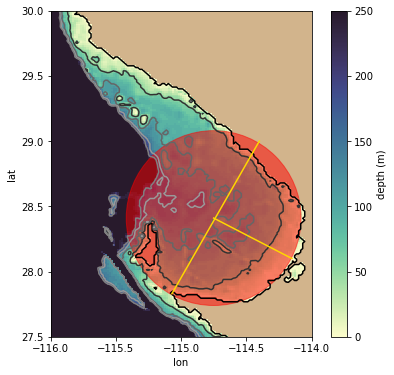

In [101]:
fig, (ax1) = plt.subplots(1,1,figsize=(7,6), sharey=True)
ax1.set_facecolor('tan')
pc1 = ax1.pcolormesh(lon,lat, np.ma.masked_array(depth, mask=mask[0,:,:]), cmap=cmo.cm.deep, vmin=0, vmax=250)
plt.colorbar(pc1, ax=ax1, label='depth (m)')
ax1.contour(lon,lat,depth,levels=[0,50,100,150,200], colors=['k','0.2','0.4','0.6','0.5','0.5'])

ax1.set_xlabel('lon')
ax1.set_ylabel('lat')
ax1.set_aspect(1)
ax1.set_xlim([-116.0,-114])
ax1.set_ylim([27.5,30.0])
ax1.set_xticks([-116,-115.5,-115,-114.5,-114])

Drawing_colored_circle = plt.Circle((-114.75, 28.41), 0.67, alpha=0.5, color='red')
ax1.add_artist( Drawing_colored_circle )

ax1.plot([-115.07,-114.4],[27.83,29],color='gold')
ax1.plot([-114.75,-114.15],[28.41,28.1],color='gold')

plt.show()

In [102]:
# Distance along the coast (haversine)
def distance(lat1,lon1,lat2,lon2):
    '''Distance using Haversine formula'''
    r = 6371 #radius of Earth (KM)
    p = np.pi/180  #Pi/180
    a = 0.5 - np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p)*np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p)) / 2
    d = 2 * r * np.arcsin(np.sqrt(a)) #2*R*asin In km
    return d

In [103]:
lon1 = -114.75
lat1 = 28.41
lon2 = -114.15
lat2 = 28.1
L = 1000*distance(lat1,lon1, lat2, lon2)

In [106]:
h = 50
g = 9.81

To = 2.22*((2*L)/((g*h)**(1/2)))
print('To= %1.2f hr' %(To/3600))

To= 3.79 hr


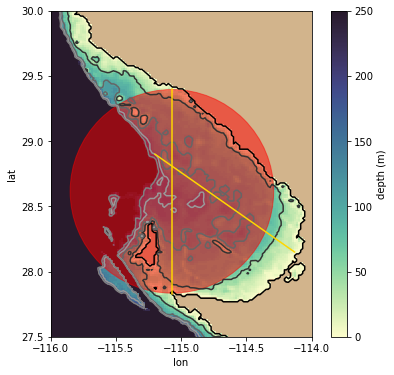

In [238]:
fig, (ax1) = plt.subplots(1,1,figsize=(7,6), sharey=True)
ax1.set_facecolor('tan')
pc1 = ax1.pcolormesh(lon,lat, np.ma.masked_array(depth, mask=mask[0,:,:]), cmap=cmo.cm.deep, vmin=0, vmax=250)
plt.colorbar(pc1, ax=ax1, label='depth (m)')
ax1.contour(lon,lat,depth,levels=[0,50,100,150,200], colors=['k','0.2','0.4','0.6','0.5','0.5'])

ax1.set_xlabel('lon')
ax1.set_ylabel('lat')
ax1.set_aspect(1)
ax1.set_xlim([-116.0,-114])
ax1.set_ylim([27.5,30.0])
ax1.set_xticks([-116,-115.5,-115,-114.5,-114])

Drawing_colored_circle = plt.Circle((-115.07, 28.615), 0.78, alpha=0.5, color='red')
ax1.add_artist( Drawing_colored_circle )

ax1.plot([-115.07,-115.07],[27.83,29.4],color='gold')
ax1.plot([-115.2,-114.13],[28.9,28.15],color='gold')

plt.show()

In [239]:
lon1 = -115.2
lat1 = 28.9
lon2 = -114.13
lat2 = 28.15
L = 1000*distance(lat1,lon1, lat2, lon2)

In [264]:
h = 100
g = 9.81

To = 2.22*((2*L)/((g*h)**(1/2)))
print('To= %1.2f hr' %(To/3600))

To= 5.27 hr


### Depth profile in bay along length

In [265]:
print('%1.2f' %lon[435])
print('%1.2f' %lat[139])

-115.21
28.90


In [266]:
print('%1.2f' %lon[504])
print('%1.2f' %lat[84])

-114.13
28.15


90.01


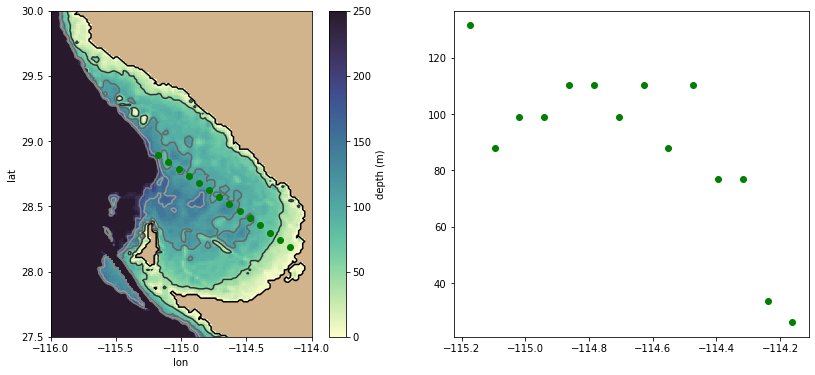

In [267]:
# Slope:
stepy = -4
stepx = 5
x1 = 437
y1 = 139
x2 = 504
y2 = 84

mean_depth = 0

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
ax1.set_facecolor('tan')
pc1 = ax1.pcolormesh(lon,lat, np.ma.masked_array(depth, mask=mask[0,:,:]), cmap=cmo.cm.deep, vmin=0, vmax=250)
plt.colorbar(pc1, ax=ax1, label='depth (m)')
ax1.contour(lon,lat,depth,levels=[0,50,100,150,200], colors=['k','0.2','0.4','0.6','0.5','0.5'])

ax1.set_xlabel('lon')
ax1.set_ylabel('lat')
ax1.set_aspect(1)
ax1.set_xlim([-116.0,-114])
ax1.set_ylim([27.5,30.0])
ax1.set_xticks([-116,-115.5,-115,-114.5,-114])

for ii in range(14):
    xx = x1+(stepx*ii)
    yy = y1+(stepy*ii)
    ax2.plot(lon[xx],depth[yy,xx],'go')
    mean_depth = mean_depth+depth[yy,xx]
    ax1.plot(lon[xx], lat[yy], 'go')

mean_depth = mean_depth/14
print('%1.2f' %mean_depth)
plt.show()